The Atoms of Computation

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use("dark_background")

In [2]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

ModuleNotFoundError: No module named 'qiskit_textbook'

In [3]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b)

In [4]:
for j in range(n):
    qc_output.measure(j,j)

qc_output.draw()

┌─┐                     
q_0: |0>┤M├─────────────────────
        └╥┘┌─┐                  
q_1: |0>─╫─┤M├──────────────────
         ║ └╥┘┌─┐               
q_2: |0>─╫──╫─┤M├───────────────
         ║  ║ └╥┘┌─┐            
q_3: |0>─╫──╫──╫─┤M├────────────
         ║  ║  ║ └╥┘┌─┐         
q_4: |0>─╫──╫──╫──╫─┤M├─────────
         ║  ║  ║  ║ └╥┘┌─┐      
q_5: |0>─╫──╫──╫──╫──╫─┤M├──────
         ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: |0>─╫──╫──╫──╫──╫──╫─┤M├───
         ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: |0>─╫──╫──╫──╫──╫──╫──╫─┤M├
         ║  ║  ║  ║  ║  ║  ║ └╥┘
 c_0: 0 ═╩══╬══╬══╬══╬══╬══╬══╬═
            ║  ║  ║  ║  ║  ║  ║ 
 c_1: 0 ════╩══╬══╬══╬══╬══╬══╬═
               ║  ║  ║  ║  ║  ║ 
 c_2: 0 ═══════╩══╬══╬══╬══╬══╬═
                  ║  ║  ║  ║  ║ 
 c_3: 0 ══════════╩══╬══╬══╬══╬═
                     ║  ║  ║  ║ 
 c_4: 0 ═════════════╩══╬══╬══╬═
                        ║  ║  ║ 
 c_5: 0 ════════════════╩══╬══╬═
                           ║  ║ 
 c_6: 0 ═══════════════════╩══╬═
                              ║ 
 c_7: 0 ══════════════════════╩═

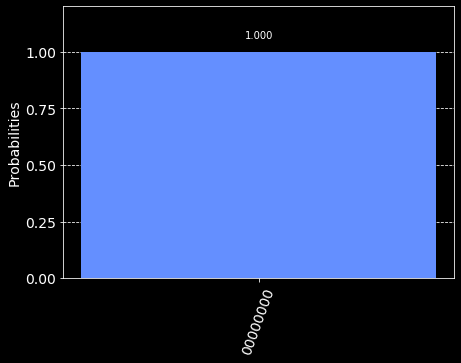

In [5]:
counts = execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Creating an Adder Circuit 

In [6]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)

qc_encode.draw()

q_0: |0>─────
             
q_1: |0>─────
             
q_2: |0>─────
             
q_3: |0>─────
             
q_4: |0>─────
             
q_5: |0>─────
             
q_6: |0>─────
        ┌───┐
q_7: |0>┤ X ├
        └───┘

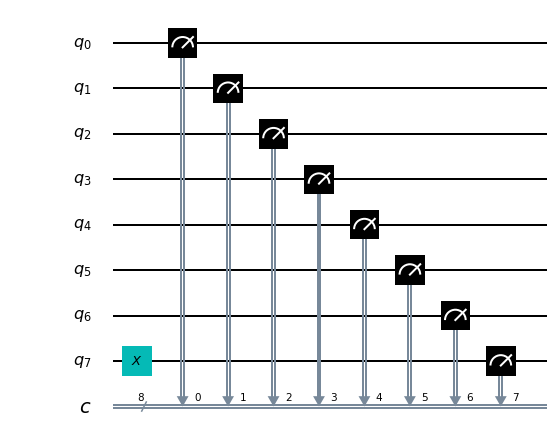

In [7]:
qc = qc_encode + qc_output
qc.draw(output='mpl',justify='none')

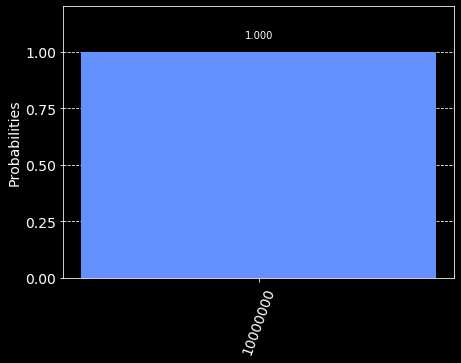

In [8]:
counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

The bit we flipped, which comes from qubit 7, lives on the far left of the string. This is because Qiskit numbers the bits in a string from right to left. Some prefer to number their bits the other way around, but Qiskit's system certainly has its advantages when we are using the bits to represent numbers. Specifically, it means that qubit 7 is telling us about how many  27 s we have in our number. So by flipping this bit, we’ve now written the number 128 in our simple 8-bit computer.

In [9]:
10110

10110

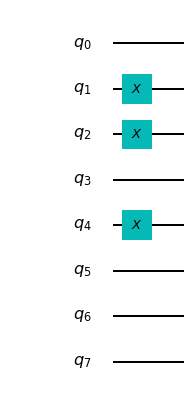

In [10]:
qc_encode = QuantumCircuit(n)
qc_encode.x(1)
qc_encode.x(2)
qc_encode.x(4)


qc_encode.draw('mpl')

Adding with Qiskit

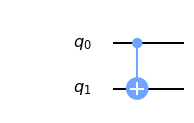

In [11]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw('mpl')

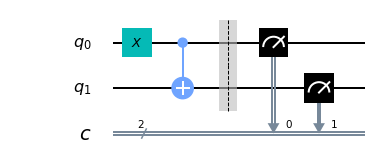

In [14]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.barrier()
qc.measure(0,0)
qc.measure(1,1)
qc.draw('mpl')

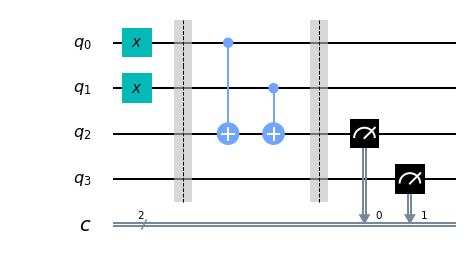

In [16]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw('mpl')

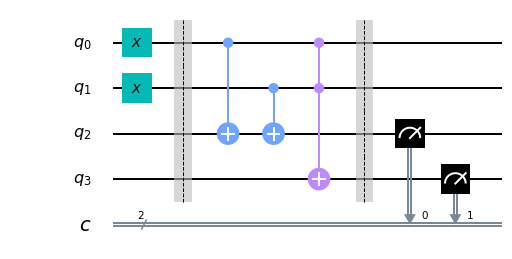

In [19]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw('mpl')

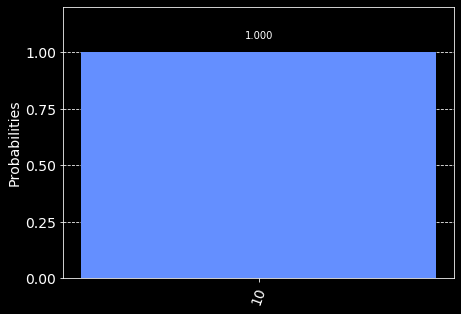

In [20]:
counts = execute(qc_ha,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)